11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.8102 - loss: 0.5890 - val_accuracy: 0.9826 - val_loss: 0.0623
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9663 - loss: 0.1193 - val_accuracy: 0.9859 - val_loss: 0.0437
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9785 - loss: 0.0786 - val_accuracy: 0.9888 - val_loss: 0.0384
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9828 - loss: 0.0626 - val_accuracy: 0.9901 - val_loss: 0.0344
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9860 - loss: 0.0478 - val_accuracy: 0.9911 - val_loss: 0.0354
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9884 - loss: 0.0476
Test accuracy: 0.991100013256073


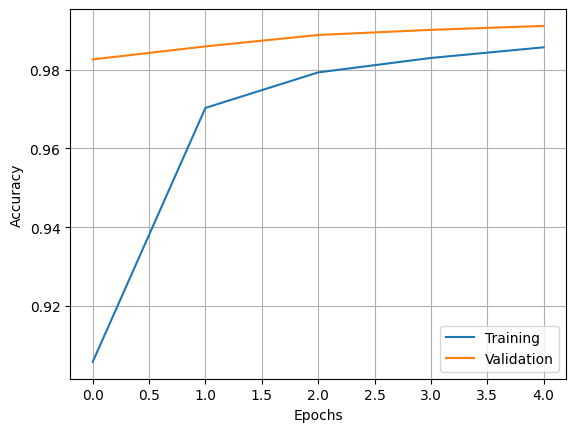

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255.0

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.AvgPool2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.AvgPool2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.grid(True)
plt.show()


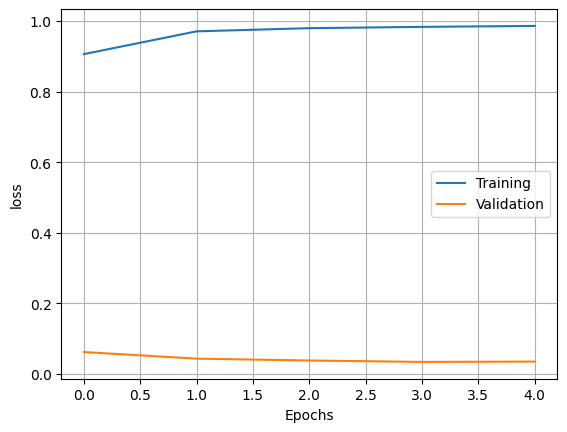

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['Training','Validation'])
plt.grid(True)
plt.show()